<a href="https://colab.research.google.com/github/milowia/python_wagon/blob/main/ML_recap_bank_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

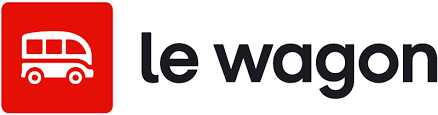

# Predicting customer churn in a bank thank to Machine Learning.


We will work on the dataset available on Kaggle [here](https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction). Download the dataset and add it to your Google Colab.

## Data exploration

Open the csv with Pandas and start by exploring the data.
How many lines ?
How many columns ?
What type of data ?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Le Wagon - DA/Feb 08 - Machine Learning/Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [ ]:
df.shape

(10002, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10002.0,5.001500e+03,2887.472338,1.00,2501.25,5001.50,7.501750e+03,10000.00
CustomerId,10002.0,1.569093e+07,71931.769345,15565701.00,15628524.75,15690732.00,1.575323e+07,15815690.00
CreditScore,10002.0,6.505551e+02,96.661615,350.00,584.00,652.00,7.180000e+02,850.00
Age,10001.0,3.892231e+01,10.487200,18.00,32.00,37.00,4.400000e+01,92.00
Tenure,10002.0,5.012498e+00,2.891973,0.00,3.00,5.00,7.000000e+00,10.00
Balance,10002.0,7.649111e+04,62393.474144,0.00,0.00,97198.54,1.276478e+05,250898.09
NumOfProducts,10002.0,1.530194e+00,0.581639,1.00,1.00,1.00,2.000000e+00,4.00
HasCrCard,10001.0,7.055294e-01,0.455827,0.00,0.00,1.00,1.000000e+00,1.00
IsActiveMember,10001.0,5.149485e-01,0.499801,0.00,0.00,1.00,1.000000e+00,1.00
EstimatedSalary,10002.0,1.000833e+05,57508.117802,11.58,50983.75,100185.24,1.493837e+05,199992.48


In [ ]:
# data preparation
df_clean = df.dropna()
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,9998.0,5.003497e+03,2886.321275,1.00,2504.25,5003.50,7.502750e+03,10000.00
CustomerId,9998.0,1.569094e+07,71923.987928,15565701.00,15628537.00,15690732.00,1.575323e+07,15815690.00
CreditScore,9998.0,6.505296e+02,96.633003,350.00,584.00,652.00,7.180000e+02,850.00
Age,9998.0,3.892029e+01,10.487986,18.00,32.00,37.00,4.400000e+01,92.00
Tenure,9998.0,5.013003e+00,2.892152,0.00,3.00,5.00,7.000000e+00,10.00
Balance,9998.0,7.648149e+04,62393.187035,0.00,0.00,97173.29,1.276414e+05,250898.09
NumOfProducts,9998.0,1.530206e+00,0.581669,1.00,1.00,1.00,2.000000e+00,4.00
HasCrCard,9998.0,7.055411e-01,0.455822,0.00,0.00,1.00,1.000000e+00,1.00
IsActiveMember,9998.0,5.148030e-01,0.499806,0.00,0.00,1.00,1.000000e+00,1.00
EstimatedSalary,9998.0,1.000998e+05,57510.939962,11.58,50983.75,100218.21,1.493959e+05,199992.48


What type of task will you be working on ?

Predict the customer's churn based on their characristics

Which columns will you use as X ? Which columns will you use as y ? Create X and y.

In [ ]:
# define X features with creditscore, tenure, HasCrCard, EstimatedSalary
X = df_clean[['CreditScore', 'Geography', 'HasCrCard', 'EstimatedSalary']]
y = df_clean['Exited']

Create a train / test split before continuing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
X_train.head(2)

,CreditScore,Geography,HasCrCard,EstimatedSalary
9895,684,Germany,1.0,80593.49
3207,667,Spain,0.0,18897.78


In [ ]:
import plotly.express as px
fig = px.histogram(X, x=['CreditScore', 'HasCrCard', 'EstimatedSalary'], marginal='rug')
fig.show()

## Prepare the data

Select the numerical columns and normalize them. Apply the transformation only on X_train.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_train_scaled = scaler.fit_transform(X_train[['CreditScore','HasCrCard', 'EstimatedSalary']])
num_test_scaled = scaler.transform(X_test[['CreditScore','HasCrCard', 'EstimatedSalary']])
num_train_scaled

array([[ 0.34639859,  0.64970723, -0.33943734],
       [ 0.17087627, -1.53915479, -1.41483937],
       [-1.03713028,  0.64970723,  1.72689614],
       ...,
       [-0.28341679,  0.64970723, -1.29271366],
       [-0.31439132,  0.64970723, -0.41607055],
       [-0.85128312,  0.64970723,  1.48897121]])

In [ ]:
fig = px.histogram(num_test_scaled, marginal='rug')
fig.show()

In [ ]:
df_num_train_scaled = pd.DataFrame(num_train_scaled, columns=scaler.get_feature_names_out())
df_num_train_scaled.shape

(7998, 3)

Select the non-numerical columns and transform them into numerical data. Apply the transformation only on X_train.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse_output =False)
ohe_train = ohe.fit_transform(X_train[['Geography']])

In [ ]:
df_ohe_train = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out())
df_ohe_train

,Geography_France,Geography_Germany,Geography_Spain
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
7993,1.0,0.0,0.0
7994,0.0,0.0,1.0
7995,0.0,0.0,1.0
7996,0.0,1.0,0.0


In [ ]:
X_train_scaled = df_num_train_scaled.join(df_ohe_train, how='inner')
X_train_scaled.shape

(7998, 6)

## Create your ML model

Select the right model according to the task and train it on the appropriate data.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## Score your model

We now want to see if our model can generalize on other data.
Prepare your X_test accordingly and score your model.

In [ ]:
df_num_test_scaled = pd.DataFrame(num_test_scaled, columns=scaler.get_feature_names_out())
df_num_test_scaled.shape

(2000, 3)

In [ ]:
ohe_test = ohe.transform(X_test[['Geography']])
df_ohe_test = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out())
df_ohe_test.shape

(2000, 3)

In [ ]:
X_test_scaled = df_num_test_scaled.join(df_ohe_test, how='inner')
X_test_scaled.head(2)

,CreditScore,HasCrCard,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-1.119729,-1.539155,1.040103,0.0,0.0,1.0
1,1.058813,-1.539155,-1.426048,0.0,1.0,0.0


In [ ]:
model.score(X_test_scaled, y_test)

0.031385439303674656